In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.svm import SVC


In [2]:
data = pd.read_csv("Churn_Modelling.csv") #reading dataset

In [3]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
data.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
plt.pie()

# EDA

In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<AxesSubplot:xlabel='Geography', ylabel='count'>

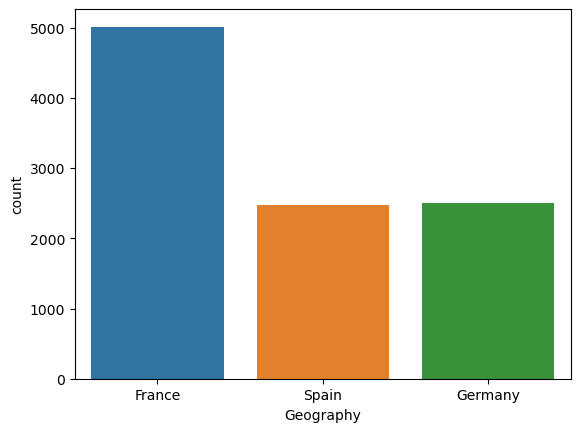

In [8]:
sns.countplot(data["Geography"])

<AxesSubplot:xlabel='Exited', ylabel='count'>

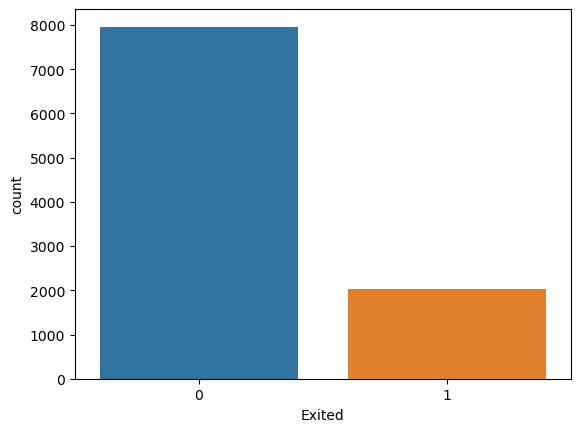

In [9]:
sns.countplot(data["Exited"])

{'whiskers': [<matplotlib.lines.Line2D at 0x22e006b4880>,
 'caps': [<matplotlib.lines.Line2D at 0x22e006b4e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x22e006b45b0>],
 'medians': [<matplotlib.lines.Line2D at 0x22e006c5400>],
 'fliers': [<matplotlib.lines.Line2D at 0x22e006c56d0>],
 'means': []}

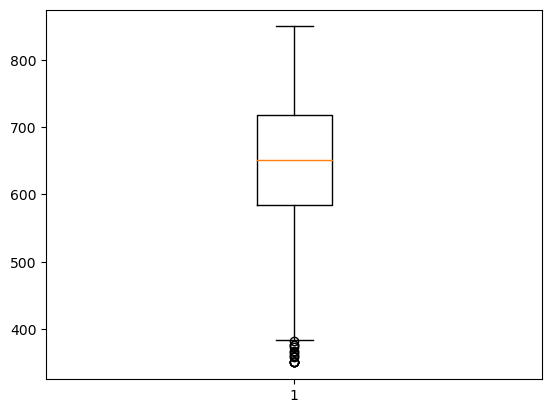

In [10]:
plt.boxplot(data["CreditScore"])

In [11]:
le = LabelEncoder()
data["Gender"] = le.fit_transform(data["Gender"])

In [12]:
x = data.drop(columns=["RowNumber","CustomerId","Surname","Geography","IsActiveMember","Exited","NumOfProducts","HasCrCard"])
y = data["Exited"]

In [13]:
x

,CreditScore,Gender,Age,Tenure,Balance,EstimatedSalary
0,619,0,42,2,0.00,101348.88
1,608,0,41,1,83807.86,112542.58
2,502,0,42,8,159660.80,113931.57
3,699,0,39,1,0.00,93826.63
4,850,0,43,2,125510.82,79084.10
...,...,...,...,...,...,...
9995,771,1,39,5,0.00,96270.64
9996,516,1,35,10,57369.61,101699.77
9997,709,0,36,7,0.00,42085.58
9998,772,1,42,3,75075.31,92888.52


In [14]:
data.Gender.value_counts()

1    5457
0    4543
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

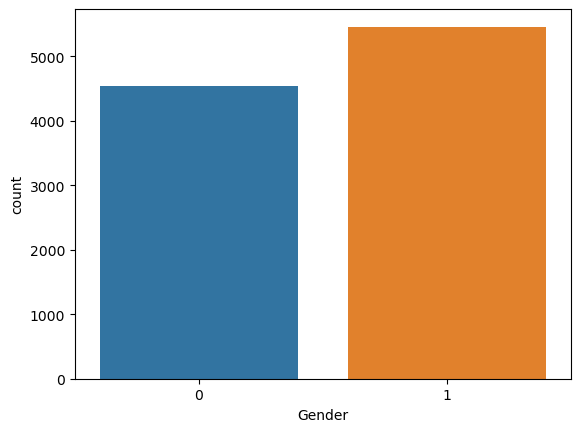

In [15]:
sns.countplot(data.Gender)

In [16]:
data.HasCrCard.value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

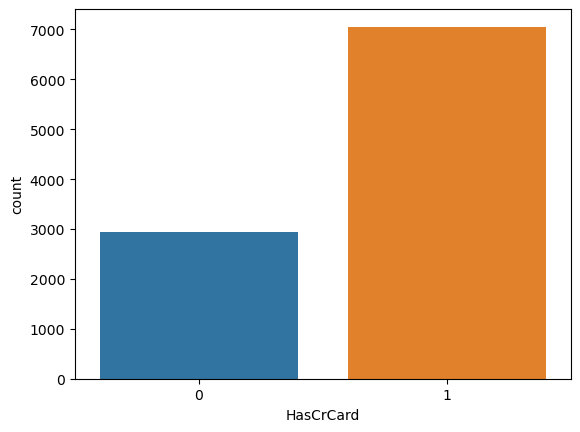

In [17]:
sns.countplot(data.HasCrCard)

{'whiskers': [<matplotlib.lines.Line2D at 0x22e0089e6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x22e0089ec70>,
 'boxes': [<matplotlib.lines.Line2D at 0x22e0089e400>],
 'medians': [<matplotlib.lines.Line2D at 0x22e008ab250>],
 'fliers': [<matplotlib.lines.Line2D at 0x22e008ab520>],
 'means': []}

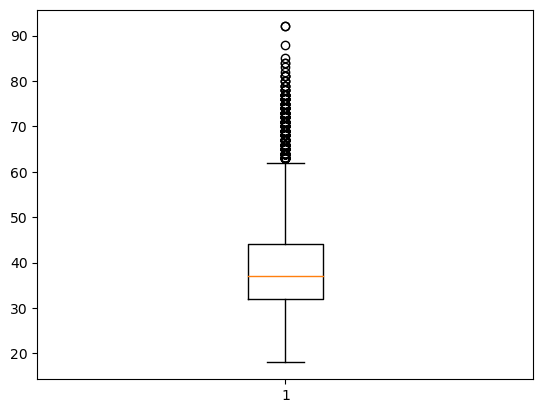

In [18]:
plt.boxplot(data["Age"])

<AxesSubplot:xlabel='Tenure', ylabel='count'>

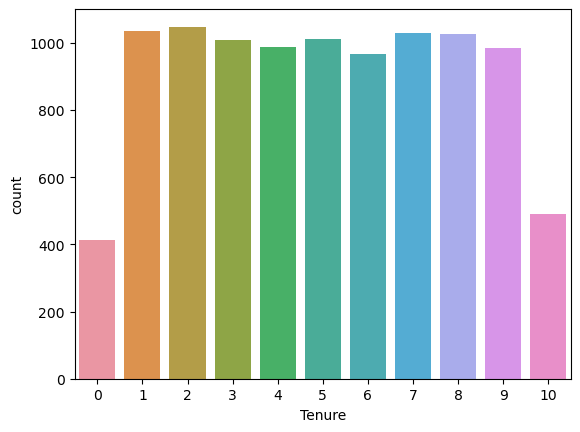

In [19]:
sns.countplot(data.Tenure)

In [20]:
pd.DataFrame(y)

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [21]:
data.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [22]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2)

<AxesSubplot:>

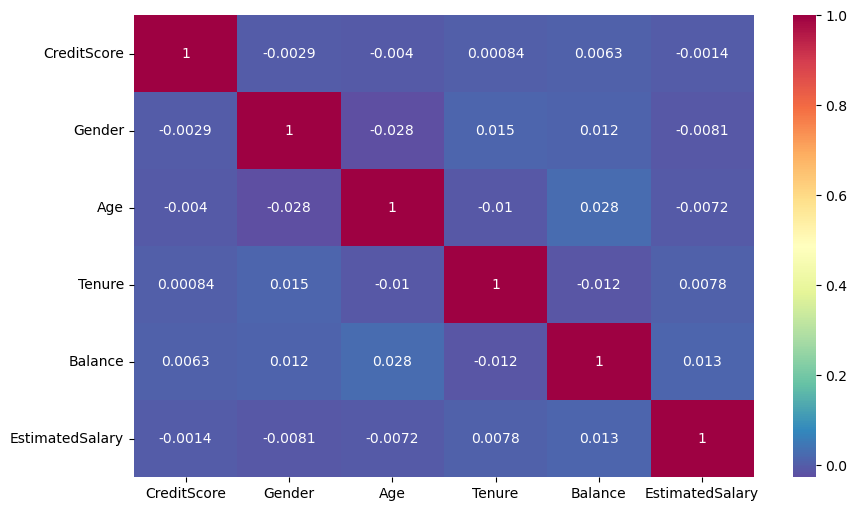

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(x.corr(),annot= True, cmap='Spectral_r')

### ml algorithms

# LogisticRegression

In [24]:
lr = LogisticRegression()

In [25]:
lr.fit(x_train,y_train)

LogisticRegression()

In [26]:
y_pred = lr.predict(x_test)

In [27]:
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [28]:
lr.score(x_test,y_test)

0.78

In [29]:
cm = confusion_matrix(y_test,lr.predict(x_test))
cm 

array([[1538,   29],
       [ 411,   22]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

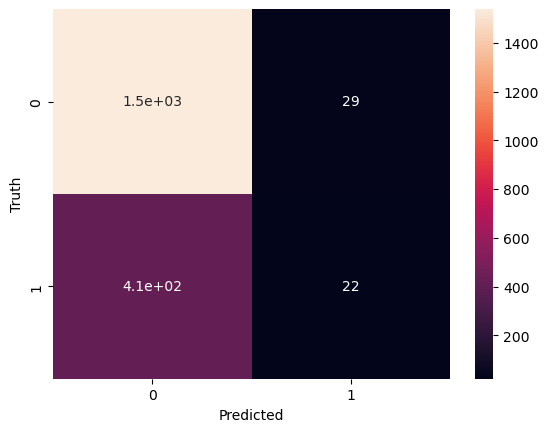

In [30]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.98      0.87      1567
           1       0.43      0.05      0.09       433

    accuracy                           0.78      2000
   macro avg       0.61      0.52      0.48      2000
weighted avg       0.71      0.78      0.71      2000



# Decision tree classifier

In [32]:
dt = DecisionTreeClassifier(max_depth=2)

In [33]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [34]:
y_pred = dt.predict(x_test)

In [35]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
dt.score(x_test,y_test)

0.7835

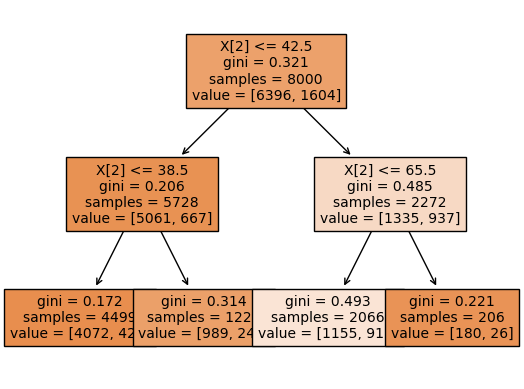

In [37]:
plot_tree(dt,fontsize=10,filled=True)
plt.show() 

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      1567
           1       0.00      0.00      0.00       433

    accuracy                           0.78      2000
   macro avg       0.39      0.50      0.44      2000
weighted avg       0.61      0.78      0.69      2000



# RandomForestClassifier

In [39]:
rfc = RandomForestClassifier(n_estimators=5)

In [40]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=5)

In [41]:
y_pred = rfc.predict(x_test)

In [42]:
rfc.score(x_test,y_test)

0.768

In [43]:
from sklearn import tree

In [44]:
rfc.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=396159106),
 DecisionTreeClassifier(max_features='auto', random_state=1257259223),
 DecisionTreeClassifier(max_features='auto', random_state=974797948),
 DecisionTreeClassifier(max_features='auto', random_state=1275147434),
 DecisionTreeClassifier(max_features='auto', random_state=1820525567)]

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1567
           1       0.44      0.29      0.35       433

    accuracy                           0.77      2000
   macro avg       0.63      0.59      0.60      2000
weighted avg       0.74      0.77      0.75      2000



# KNN

In [46]:
knn = KNeighborsClassifier(n_neighbors=4)

In [47]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [48]:
y_pred = knn.predict(x_test)

In [49]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
knn.score(x_test,y_test)

0.7695

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87      1567
           1       0.29      0.05      0.08       433

    accuracy                           0.77      2000
   macro avg       0.54      0.51      0.47      2000
weighted avg       0.68      0.77      0.70      2000



# SVC

In [52]:
svc = SVC()

In [53]:
svc.fit(x_train,y_train)

SVC()

In [54]:
y_pred = svc.predict(x_test)

In [55]:
svc.score(x_test,y_test)

0.7835

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      1567
           1       0.00      0.00      0.00       433

    accuracy                           0.78      2000
   macro avg       0.39      0.50      0.44      2000
weighted avg       0.61      0.78      0.69      2000



In [57]:
import pickle

In [58]:
pickle.dump(dt,open("project","wb"))

In [59]:
x.head(1)

,CreditScore,Gender,Age,Tenure,Balance,EstimatedSalary
0,619,0,42,2,0.0,101348.88


In [60]:
CreditScore = int(input("enter credit score :"))
Gender = int(input("enter gender of person :"))
Age = int(input("enter age :"))
Tenure = int(input("enter tenure :"))
Balance = float(input("enter balace :"))
NumOfProducts = int(input("enter numofproduct :"))
HasCrCard = int(input("enter hascrcredit :"))
EstimatedSalary = float(input("enter salary :"))
pred = dt.predict([[CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary]])
print(pred)
if pred ==1:
    print("customer exited the bank")
else:
    print("person has not exited the bank")

enter credit score :600
enter gender of person :0
enter age :20
enter tenure :20
enter balace :1
enter numofproduct :1
enter hascrcredit :1
enter salary :500000


ValueError: X has 8 features, but DecisionTreeClassifier is expecting 6 features as input.

In [61]:
!pip install pandas-profiling

Defaulting to user installation because normal site-packages is not writeable


In [62]:
from pandas_profiling import ProfileReport

In [63]:
profile = ProfileReport(x,explorative=True,dark_mode=True)

In [64]:
profile.to_file("output1.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]